Source: https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook

# Titanic Machine Learning (replicated from Kaggle)

Packages

In [1]:
# Analysis
import pandas as pd
import numpy as np
import random as rnd

# Plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Data Import

In [14]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# EDA

In [15]:
print(train_df.columns.values)
train_df.columns = map(str.lower, train_df.columns) # convert column names to lowercase
train_df.columns.values

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


array(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'], dtype=object)

In [17]:
# Data type for each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
train_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train_df.info()
print('_' * 40)
test_df.info()
# we can see that survived is not included in test_df since it is something that we want to predict using machine learning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [22]:
train_df.describe()
# shows statistics for numerical columns only (2 float (age & fare), 4 int (passengerid, pclass, sibsp, parch))

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
train_df.describe(include = 'O')
# putting include = 'O' inside describe gives statistics of object type columns

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Attalah, Mr. Sleiman",male,1601,B96 B98,S
freq,1,577,7,4,644


## Calculating Relationships between Survival Rate and Integer Columns

In [28]:
train_df[['pclass', 'survived']].groupby('pclass', as_index = False).mean().sort_values(by = 'survived', ascending = False)
# if we include as.index = False inside groupby(), the grouping column is inserted as another column in the dataframe

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [26]:
train_df[['sex', 'survived']].groupby('sex', as_index = False).mean().sort_values(by = 'survived', ascending = False)

,sex,survived
0,female,0.742038
1,male,0.188908


In [29]:
train_df[['sibsp', 'survived']].groupby('sibsp', as_index = False).mean().sort_values(by = 'survived', ascending = False)

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [30]:
train_df[['parch', 'survived']].groupby('parch', as_index = False).mean().sort_values(by = 'survived', ascending = False)

,parch,survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Histogram to Identify Survival Rate and Float Columns

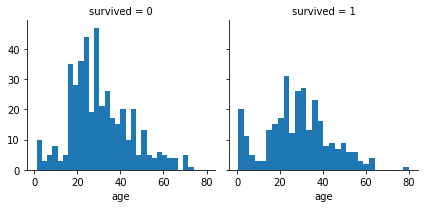

In [36]:
g = sns.FacetGrid(train_df, col = 'survived')
g.map(plt.hist, 'age', bins = 30)

We can see from this histogram that survival rate is correlated with age (babies' survival rate seems to be a lot higher compared to others, and people of age 20-30's survival rate is a lot lower than other ages)

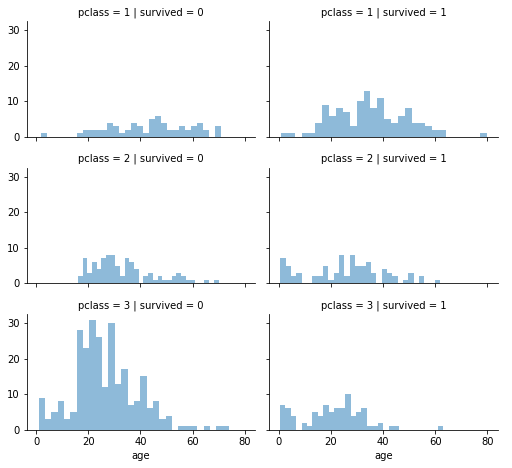

In [39]:
grid = sns.FacetGrid(train_df, col = 'survived', row = 'pclass', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'age', alpha = 0.5, bins = 30)
grid.add_legend()
# shows histogram by each combination of pclass and survived

Survival also seems to have depended on the ticket class (pclass) as 3rd class survived the least

## Survival Rate and Categorical Columns

C:\Users\lsh95\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\lsh95\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


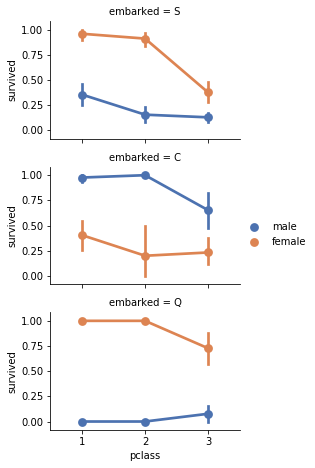

In [40]:
grid = sns.FacetGrid(train_df, row = 'embarked', height = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette = 'deep')
grid.add_legend()

Embarkment also seems to be correlated with survival: most men that embarked at Cherbourg survived, while men that embarked that Queenstown or Southampton was not able to survive as much. Furthermore, survival rates for male and female seems to vary by a lot

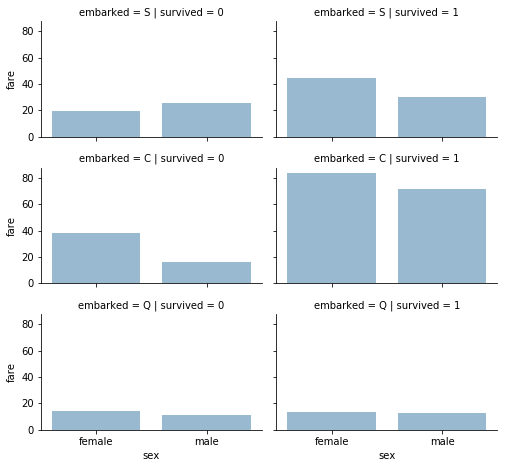

In [43]:
grid = sns.FacetGrid(train_df, row = 'embarked', col = 'survived', height = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'sex', 'fare', alpha = 0.5, ci = None)
grid.add_legend()

People who paid higher fares (higher bars, Cherbourg) survived more than people who paid lower fares (Queenstown & Southampton)